# Requirements


[PostgreSQL 12](https://www.postgresql.org/docs/12/index.html)

## Basics
The questions you ask are up to you.

- All **four** of your final submitted queries should contain a **JOIN** and **AGGREGATION**.
- At least **two** of your final submitted queries should contain either a **subquery** OR a **CTE**.
- At least **one** of your final submitted queries should contain a **Window Function**.
- At least **one column** generated by the **Window Function** should be included in one of your final **visualization**.
- Check against [the Project Rubic](https://review.udacity.com/#!/rubrics/2095/view)
- Submit [here](https://classroom.udacity.com/nanodegrees/nd104/parts/1954dd2c-6bfd-4d92-b59b-40d6dd298f24/modules/ea7f4990-0e12-4009-ab5d-dfc0353f2505/lessons/3dc22711-adb9-4e58-a299-fc89bce79d86/project)

## Additional Guidelines
- There shouldn’t be any additional data prep (sorting, filtering, renaming, etc.) between the query output and the visualization.

- Once you've finished your project, submit the presentation as a PDF and the queries as a `.txt` file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Connect to Database

In [2]:
#Initialize engine for db connection
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost/dvdrental') # create connetion string for %sql magic to use

## Show All Tables

In [3]:
%load_ext sql
%sql postgresql://localhost/dvdrental
%sql r << SELECT * FROM information_schema.tables WHERE table_type='BASE TABLE' and table_schema='public'

 * postgresql://localhost/dvdrental
17 rows affected.
Returning data to local variable r


In [4]:
list(pd.DataFrame(r)[2])

['actor',
 'store',
 'address',
 'category',
 'city',
 'country',
 'customer',
 'film_actor',
 'film_category',
 'inventory',
 'language',
 'rental',
 'staff',
 'payment',
 'unpaid_rental',
 'film',
 'pastdue_rentals']

# Inspect Table Schema

## View Columns and Data Types

Replace `tbl_name` string to show the schema of another table.

In [5]:
tbl_name = 'customer'
%sql SELECT * FROM information_schema.columns WHERE table_name=:tbl_name

 * postgresql://localhost/dvdrental
10 rows affected.


table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,numeric_precision,numeric_precision_radix,numeric_scale,datetime_precision,interval_type,interval_precision,character_set_catalog,character_set_schema,character_set_name,collation_catalog,collation_schema,collation_name,domain_catalog,domain_schema,domain_name,udt_catalog,udt_schema,udt_name,scope_catalog,scope_schema,scope_name,maximum_cardinality,dtd_identifier,is_self_referencing,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
dvdrental,public,customer,customer_id,1,nextval('customer_customer_id_seq'::regclass),NO,integer,None,None,32,2,0,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,int4,None,None,None,None,1,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,store_id,2,None,NO,smallint,None,None,16,2,0,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,int2,None,None,None,None,2,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,first_name,3,None,NO,character varying,45,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,varchar,None,None,None,None,3,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,last_name,4,None,NO,character varying,45,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,varchar,None,None,None,None,4,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,email,5,None,YES,character varying,50,200,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,varchar,None,None,None,None,5,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,address_id,6,None,NO,smallint,None,None,16,2,0,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,int2,None,None,None,None,6,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,activebool,7,true,NO,boolean,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,bool,None,None,None,None,7,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,create_date,8,('now'::text)::date,NO,date,None,None,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,date,None,None,None,None,8,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,last_update,9,now(),YES,timestamp without time zone,None,None,None,None,None,6,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,timestamp,None,None,None,None,9,NO,NO,None,None,None,None,None,NO,NEVER,None,YES
dvdrental,public,customer,active,10,None,YES,integer,None,None,32,2,0,None,None,None,None,None,None,None,None,None,None,None,None,dvdrental,pg_catalog,int4,None,None,None,None,10,NO,NO,None,None,None,None,None,NO,NEVER,None,YES


## View All Foreign Keys in the Table

In [6]:
%%sql 
SELECT tc.constraint_name, 
       tc.table_name, 
       kcu.column_name, 
       ccu.table_schema AS foreign_table_schema,
       ccu.column_name AS foreign_column_name 
FROM information_schema.table_constraints AS tc 
JOIN information_schema.key_column_usage AS kcu
ON tc.constraint_name = kcu.constraint_name and tc.table_schema = kcu.table_schema
JOIN information_schema.constraint_column_usage AS ccu
ON ccu.constraint_name = tc.constraint_name and ccu.table_schema = tc.table_schema
WHERE tc.constraint_type='FOREIGN KEY' AND tc.table_name=:tbl_name

 * postgresql://localhost/dvdrental
1 rows affected.


constraint_name,table_name,column_name,foreign_table_schema,foreign_column_name
customer_address_id_fkey,customer,address_id,public,address_id


In [7]:
%sql SELECT * from customer LIMIT 5

 * postgresql://localhost/dvdrental
5 rows affected.


customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738000,1
1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738000,1
2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738000,1
3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738000,1
4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738000,1


# Extract Data for Analysis

## Question 1: Which countries have the most paying customers? 

- Select the Top 5% countries with most paying customers than the rest. 
- List the total number of paying customers for these top countries.

In [8]:
%%sql r <<
/*===== Create t1 that selects country name, number of customer by country and its percentile ====*/
WITH t1 AS(
SELECT con.country_id,
       con.country,
       COUNT(DISTINCT p.customer_id) total_paying_customer,
       PERCENT_RANK() OVER(ORDER BY COUNT(cus.customer_id)) as percent_rank 
FROM payment p
JOIN customer cus ON p.customer_id = cus.customer_id
JOIN address a ON cus.address_id = a.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country con ON con.country_id = c.country_id
GROUP BY 1,2)

/*=== 2. Filter t1 result to show only the Top 5% countries with most customers ===*/
SELECT t1.country, 
       total_paying_customer 
FROM t1
WHERE percent_rank >= 0.95
ORDER BY 2 DESC;

 * postgresql://localhost/dvdrental
6 rows affected.
Returning data to local variable r


In [9]:
# Show result
top_countries = r.DataFrame()
top_countries

,country,total_paying_customer
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30
5,Brazil,28


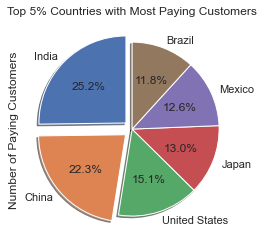

In [10]:
# Visualize the result

# show countries with more than 40 customers with explode effect
explode = tuple([0.1 if x>40 else 0 for x in top_countries['total_paying_customer'] ])

plt.pie(top_countries['total_paying_customer'], 
        labels=top_countries['country'],
        autopct='%1.1f%%', explode=explode,
        shadow=True, startangle=90)

# decorate the graph
plt.ylabel('Number of Paying Customers')
plt.title('Top 5% Countries with Most Paying Customers')
plt.show()

## Question 2: Which film catgories are popular among the Top 5% countries?

##### 1. Popularity of categories in each country

In [11]:
top5perc = tuple(top_countries['country']) # sql uses tuple for list of data

In [12]:
%%sql r <<
WITH t1 AS(
SELECT c.name,f.title, f.film_id
from film_category fc
JOIN category c ON fc.category_id = c.category_id
JOIN film f ON f.film_id = fc.film_id)

SELECT 
     t1.name AS category, 
     co.country,
     COUNT(*)
FROM inventory i 
JOIN rental r ON r.inventory_id = i.inventory_id
JOIN t1 ON t1.film_id = i.film_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country co ON co.country_id = c.country_id WHERE country in :top5perc
GROUP BY 1, 2

 * postgresql://localhost/dvdrental
96 rows affected.
Returning data to local variable r


In [13]:
# Display part of the result
df=r.DataFrame()
df.sort_values(['country', 'count'], ascending=False).head()

,category,country,count
93,Documentary,United States,74
41,Sports,United States,73
92,Drama,United States,69
32,Animation,United States,68
64,Family,United States,66


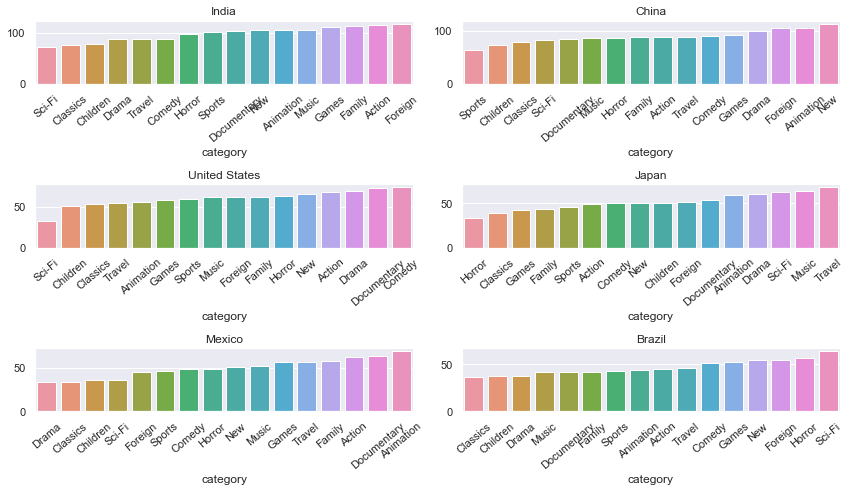

In [14]:
# Visualize popular categories in Top 5% countries
fig, axes = plt.subplots(3,2,figsize=(12, 7))

for i, country in enumerate(top5perc):
    data=df.loc[df.country==country]
    sns.barplot(x=data['category'], y=sorted(data['count']), ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'{country}')
    axes.flatten()[i].set_xticklabels(data['category'], rotation=40)

fig.set_tight_layout(3)
plt.show()

##### 2. Compare popularity by category among Top 3 countries

In [15]:
# Compare popularity of categories among China, India and US
top3 = ['China', 'India', 'United States']
df = df.loc[df.country.isin(top3)]

# Prepare data for bar plots
df_aggregate = (df.pivot_table(index='category', columns='country', values='count', 
                    aggfunc=sum, margins=True, margins_name='Total')
                .sort_values(['Total', 'China', 'India', 'United States']))
df_aggregate

country,China,India,United States,Total
category,,,,
Travel,63,73,33,169
Music,79,77,51,207
Horror,74,88,62,224
Games,92,78,60,230
New,90,89,55,234
Comedy,88,88,59,235
Classics,88,104,54,246
Sci-Fi,82,106,62,250
Children,89,106,56,251


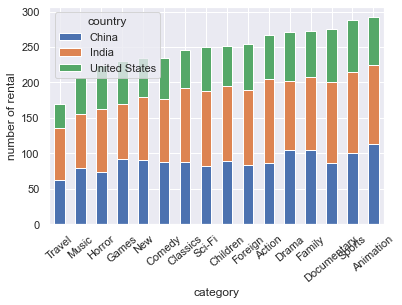

<Figure size 1080x1080 with 0 Axes>

In [16]:
df_aggregate.iloc[:-1, :-1].plot(kind='bar', stacked=True) # not to include marginal totals in the plot
plt.xticks(rotation=40)
plt.ylabel('number of rental')
plt.figure(figsize=(15, 15))
plt.show()

##### Conclusion

The data shows that, overall speaking, animation is the most popular category among all customers in India, China and United States. Although the customers in these countries have displayed different preferences in other categories, for example, customers in India favor foreign and action movies the most, those in China favor new and animation movies the most, while those in the US favor comedy, documentary and drama the most. 

## Question 3: Who are the popular movie stars in Top 3 Countries?

Which 5 artists are most popular in each of the Top 3 countries? I'll rank the popularity of the movie stars for each country. 

In [17]:
%%sql r <<
WITH t1 AS(
SELECT DISTINCT con.country, 
       fa.actor_id, 
       COUNT(r.*) OVER (PARTITION BY con.country, fa.actor_id) rental_count
FROM film_actor fa
JOIN film f ON fa.film_id = f.film_id
JOIN inventory i ON i.film_id = f.film_id
JOIN rental r ON r.inventory_id = i.inventory_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country con ON con.country_id = c.country_id 
                    AND con.country IN ('China', 'India', 'United States')),

t2 AS (
SELECT *, 
       ROW_NUMBER() OVER (PARTITION BY country 
                          ORDER BY  rental_count DESC) actor_rank
FROM t1
),

t3 AS (
SELECT * 
FROM t2
WHERE actor_rank <= 5)

SELECT country, 
       a.first_name || ' ' ||a.last_name as actor,
       actor_rank, rental_count
FROM actor a 
JOIN t3 ON t3.actor_id = a.actor_id AND t3.rental_count > 1
ORDER BY 1, 3

 * postgresql://localhost/dvdrental
15 rows affected.
Returning data to local variable r


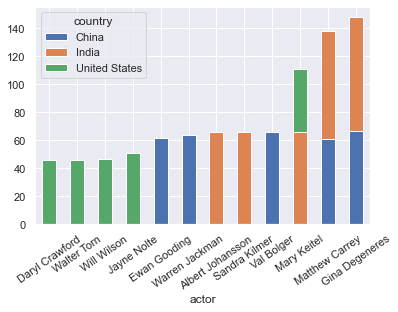

In [18]:
df = r.DataFrame()

# Aggregate data
df_aggregate = (df.pivot_table(index='actor', columns='country', values='rental_count', 
                aggfunc=sum, margins=True, margins_name='Total')).sort_values('Total')
# Display barchart of aggregated data
df_aggregate.iloc[:-1, :-1].plot(kind='bar', stacked='True')
plt.xticks(rotation=35)
plt.show()

##### Conclusion

12 actors/actresses are among the Top 5 popular movie stars of China, India and the US. 

Gina Degeneres is the most popular with highest rental count, followed by Mathew Carrey. They are found among Top 5 in both China and India; While Mary Keitel is among the top 5 in both India and the US. 

## Question 4: Is business growing in the Top 3 countries?

As observed from the above, India, China and US are the Top 3 countries with most paying customers. Let's take a look at the health of business in these countries.

First, we need confirm how many months of rental data we have.

In [19]:
%%sql 
/*===how many months of data we have===*/
SELECT DISTINCT DATE_TRUNC('month', t.rental_date) 
FROM (SELECT DISTINCT rental_date from rental) AS t ORDER BY 1

 * postgresql://localhost/dvdrental
5 rows affected.


date_trunc
2005-05-01 00:00:00
2005-06-01 00:00:00
2005-07-01 00:00:00
2005-08-01 00:00:00
2006-02-01 00:00:00


Apparently, this is a small dataset with missing data for 5 months! If this was not a fictional data, we as analyst shall talk to the concerned party to resolve this issue. However, for learning purpose and completion of the course, I'll continue answering the question using the data as is.

In [20]:
top3 = tuple(top3)

In [21]:
%%sql r <<

---Summarize rental count by country by month----
WITH t1 AS
(SELECT con.country, 
        to_char(DATE_TRUNC('month', rental_date), 'YYYY-MM') as month,
        COUNT(r.*) as rental_count
from rental r
JOIN customer cus 
ON r.customer_id=cus.customer_id
JOIN address a 
ON a.address_id = cus.address_id
JOIN city c 
ON c.city_id = a.city_id
JOIN country con 
ON con.country_id = c.country_id WHERE con.country in :top3
GROUP BY 1,2)

----Calculate monthly differences---
SELECT  country,
        month,
        rental_count,
        /*===`LEAD() over` similar to `df.shift(-1)`===*/
        LEAD(rental_count, 1) OVER w1 as next_month_rental_count,
        (LEAD(rental_count, 1) OVER w1 - rental_count) as difference
FROM t1
WINDOW w1 AS (PARTITION BY country ORDER BY month) ---window function 
ORDER BY 1,2;

 * postgresql://localhost/dvdrental
15 rows affected.
Returning data to local variable r


We don't have data after February 2006, therefore, we will only use the months ahead. Let's drop the results with missing data.

In [22]:
df = r.DataFrame()
df.dropna(inplace=True)
df

,country,month,rental_count,next_month_rental_count,difference
0,China,2005-05,109,198.0,89.0
1,China,2005-06,198,594.0,396.0
2,China,2005-07,594,512.0,-82.0
3,China,2005-08,512,13.0,-499.0
5,India,2005-05,111,208.0,97.0
6,India,2005-06,208,651.0,443.0
7,India,2005-07,651,579.0,-72.0
8,India,2005-08,579,23.0,-556.0
10,United States,2005-05,70,152.0,82.0
11,United States,2005-06,152,376.0,224.0


In [23]:
# waterfallcharts module from github: https://github.com/chrispaulca/waterfall
import waterfall_chart
def plot_waterfall(x_col, y_col, filter_by, search, df):
    y = pd.to_numeric(df.loc[df[filter_by]==search, y_col])
    x = df.loc[df[filter_by]==search, x_col]
    waterfall_chart.plot(x,y, rotation_value=30, 
                         formatting='{:,.2f}',
                         net_label='Net Difference',
                         y_lab='Difference from last month',
                         Title=search)
    plt.show()

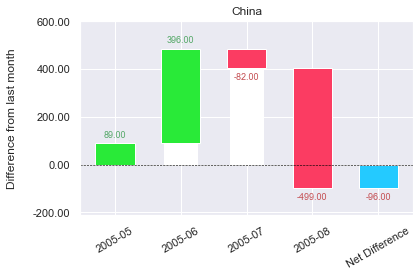

In [24]:
plot_waterfall('month', 'difference', 'country', 'China', df)

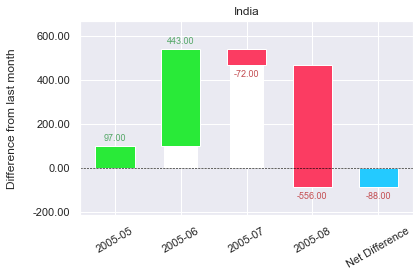

In [25]:
plot_waterfall('month', 'difference', 'country', 'India', df)

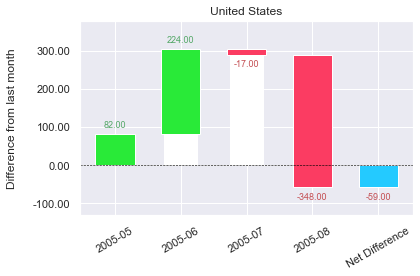

In [26]:
plot_waterfall('month', 'difference', 'country', 'United States', df)

##### Conclusion

According to the data, all top 3 countries experience big drop in business volume starting from July 2005. They all ended up with negative growth comparing the data of first month and last month.

## Question 5: Probing further to find other problems

##### Any unreturned rentals?

In [27]:
%%sql
SELECT rental_id, rental_date, return_date 
from rental r WHERE return_date = Null

 * postgresql://localhost/dvdrental
0 rows affected.


rental_id,rental_date,return_date


There is no result returned for this query, therefore, all rentals are returned.

##### Any rental unpaid?

In [524]:
%%sql unpaid <<
SELECT count(*) 
FROM rental r
LEFT JOIN payment p 
ON p.rental_id = r.rental_id WHERE p.rental_id IS NULL

 * postgresql://localhost/dvdrental
1 rows affected.
Returning data to local variable unpaid


In [525]:
%sql total_rental << SELECT COUNT(*) from rental

 * postgresql://localhost/dvdrental
1 rows affected.
Returning data to local variable total_rental


In [530]:
unpaid.DataFrame().iloc[0]/total_rental.DataFrame().iloc[0]

count    0.090501
Name: 0, dtype: float64

##### Conclusion

It's a warning flag to observe 9% of rentals are unapid although they have been returned. Let's explore more of this issue, like, how much money we have not collected? Which store has the highest outstanding balances? How many customers that haven't paid us? Where are those customers from? 

# Estimating the Outstanding Balances


## How the payment amount is calculated


In real life application, we need to ask the stores to confirm their fee schedule to determine how much outstanding balances are there for the unpaid rental. However, in this fictional case study, we can either explore how payment amount is calculated by observing the paid rentals data or make up the rule for fee scheudle.

I'll explore the relevant variables and then run a OLS multiple regression analysis to find the best fit model for payment amount estimation.

In [542]:
%%sql r <<

SELECT r.rental_id,
       rental_date,
       return_date,
       p.amount,
       i.store_id,
       con.country,
       rental_rate,
       /*====extract duration with second precision and then convert to equivalent in day unit====*/
       round((EXTRACT(epoch from DATE_TRUNC('second', return_date-rental_date))/3600/24)::numeric, 2) duration
from rental r
JOIN payment p ON p.rental_id = r.rental_id
JOIN inventory i ON i.inventory_id = r.inventory_id
JOIN film f ON f.film_id = i.film_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country con ON con.country_id = c.country_id
---WHERE country in ('China', 'India', 'United States')---

 * postgresql://localhost/dvdrental
14596 rows affected.
Returning data to local variable r


In [543]:
# save the result to df
rental_paid = r.DataFrame()

Let's make sure no duplicated rental_id:

In [544]:
%%sql
SELECT r.rental_id
FROM rental r 
JOIN payment p ON p.rental_id = r.rental_id
GROUP BY r.rental_id
HAVING count(*)>1

 * postgresql://localhost/dvdrental
1 rows affected.


rental_id
4591


In [545]:
# check the records with the duplicated rental_id
rental_paid.loc[rental_paid['rental_id']==4591]

,rental_id,rental_date,return_date,amount,store_id,country,rental_rate,duration
2015,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,1.99,1,United States,0.99,9.04
7659,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,1.99,1,United States,0.99,9.04
11660,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,0.99,1,United States,0.99,9.04
13566,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,3.99,1,United States,0.99,9.04
14331,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,3.99,1,United States,0.99,9.04


In real life application, it's impossible to have duplicated records using duplicated rental ids as above with data verification methods in place. I guess the error is generated during the process of random assignment of data by the creator.

In [546]:
# drop the duplicated rentals
rental_paid = rental_paid.drop_duplicates('rental_id')

Let's continue with other data cleaning tasks.

In [547]:
# drop missing values
rental_paid = rental_paid.dropna().reset_index(drop=True)

# convert dtypes
rental_paid['amount'] = rental_paid['amount'].astype(float)
rental_paid['rental_rate'] = rental_paid['rental_rate'].astype(float)
rental_paid['duration']=rental_paid['duration'].astype(float)

# customer data columns
rental_paid['rental_month'] = rental_paid['rental_date'].dt.to_period('M')
rental_paid['return_month'] = rental_paid['return_date'].dt.to_period('M')
rental_paid = rental_paid.drop(['rental_date', 'return_date'], axis=1)

# inspect head data
rental_paid.head()

,rental_id,amount,store_id,country,rental_rate,duration,rental_month,return_month
0,1520,7.99,1,Netherlands,4.99,8.99,2005-06,2005-06
1,1778,1.99,2,Netherlands,0.99,5.88,2005-06,2005-06
2,1849,7.99,1,Netherlands,4.99,6.77,2005-06,2005-06
3,2829,2.99,1,Netherlands,2.99,4.87,2005-06,2005-06
4,3130,7.99,1,Netherlands,4.99,8.96,2005-06,2005-06


In [548]:
rental_paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14409 entries, 0 to 14408
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   rental_id     14409 non-null  int64    
 1   amount        14409 non-null  float64  
 2   store_id      14409 non-null  int64    
 3   country       14409 non-null  object   
 4   rental_rate   14409 non-null  float64  
 5   duration      14409 non-null  float64  
 6   rental_month  14409 non-null  period[M]
 7   return_month  14409 non-null  period[M]
dtypes: float64(3), int64(2), object(1), period[M](2)
memory usage: 900.7+ KB


### Determing Variables for Study


Before we run the regression analysis, let's use the average amount being charged per day per rental to explore two things:

1. how payment amount is related to rental rate and duration of the rentals;
2. if we can assume all countries adopt the same fee schedules.

In [575]:
# calculate average amount charged per day per rental
rental_paid['avg_amt_day'] = rental_paid['amount']/rental_paid['duration']

In [579]:
# how many tiers of rental rate in the dataset
rental_paid['rental_rate'].value_counts()

0.99    5070
4.99    4728
2.99    4611
Name: rental_rate, dtype: int64

In [576]:
# how many countries in the dataset
rental_paid['country'].nunique()

108

In [698]:
# calculate the means of the average amount charged per day per rental for all countries 
# and group by tier
agg_avg_amt = rental_paid.pivot_table(values='avg_amt_day', index='country', columns='rental_rate',
                        aggfunc={'avg_amt_day': 'mean'})

# summary of the distributions of average `avg_amt_day` of all countries by tier
agg_avg_amt.describe()

rental_rate,0.99,2.99,4.99
count,108.000000,108.000000,108.000000
mean,0.483548,1.088982,1.722008
std,0.060750,0.194652,0.368596
min,0.269258,0.732117,0.873131
25%,0.450648,0.962889,1.477368
50%,0.490487,1.070677,1.727709
75%,0.524708,1.184040,1.910431
max,0.632717,1.930789,2.991928


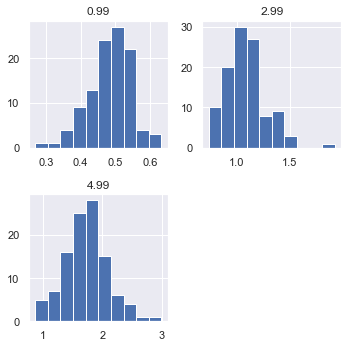

In [714]:
# visualize the histograms
agg_avg_amt.hist(figsize=(5,5))
plt.tight_layout()
plt.show()

Although the dataset is incomplete and limited, we can still see that the average amount being charged per day per rental is approximately normally distributed. That means we can use the dataset to estimate the average amount to be charged per day per rental for all countries.

Let's take a closer look at the rentals priced at different rate tiers:

1. For the rentals priced at `0.99`:
    - They are being charged, on average, for about `0.48` per day in all 108 countries;
    - More than 50% of these rentals are being charged from `0.45` to `0.52` per day;
    - Around 95% of these rentals are being charged from `0.42` to `0.54`, as the standard deviation equals `0.06`;
    
    
2. For the rentals priced at `2.99`:
    - They are being charged, on average, for about `1.09` per day in all 108 countries;
    - More than 50% of these rentals are being charged from `0.96` to `1.18` per day;
    - Around 95% of these rentals are being charged from `0.895` to `1.285` per day, as the standard deviation euqals `0.195`;
    
    
3. For the rentals priced at `4.99`:

    - They are being charged, on average, for about `1.72` per day in all 108 countries;
    - More than 50% of these rentals are being charged from `1.48` to `1.91` per day;
    - Around 95% of these rentals are being charged from `1.35` to `2.09` per day, as the standard deviation equals `0.37`



Now, I'd like to check if the fee schedules (how the amount being charged) are almost the same in all countries before proceeding to using the whole dataset for regression analysis. 

In [717]:
# Select the top 5% countries with most customers
# the table shows the average amount charged per day per rental by tier in these countries
agg_avg_amt.filter(items=top5perc, axis=0)

rental_rate,0.99,2.99,4.99
country,,,
India,0.492239,1.112258,1.733005
China,0.479231,1.122912,1.889414
United States,0.495384,1.031713,1.599811
Japan,0.521637,1.139835,1.677991
Mexico,0.500297,1.177746,1.901805
Brazil,0.525572,0.987388,1.807974


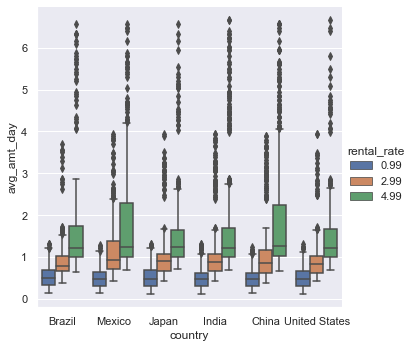

In [720]:
# Visualize the distributions of average amount charged per day per rental in these countries
sns.catplot(kind='box', x='country', y='avg_amt_day', hue='rental_rate',
            data = rental_paid.query('country in @top5perc')
                   [['country', 'rental_rate', 'avg_amt_day']]
           )
plt.show()

The average amount charged per day is almost the same among the selected countries for all rental rate tiers. 

However, we can identify some abnormality as well:

1. In all these countries, the higher the rental rate, the more varied the average amount being charged per day; 
2. All of the countries are found with high outliers that can be more than double of the max value in box plot, which is $Q_3 + 1.5(IQR)$;
3. Also, for the rentals priced at `2.99` and `4.99`, China and Mexico customers are being charged for much more varied amount per day.

I think part of the reason why there are high outliers and unequal variability in different countries is due to the fact that this is a synthesized dataset. If this is in real life, as any analyst, we can talk to the stores to find out their pricing policy. For example, did they have promotions on some dates, were some rentals charged for damage penalty or late fee, if some customers are using coupons and so on.

Since we can't find those information from the data we have, I would just continue as is assuming all countries follow the same fee schedules.


### Exploring Relationships between Variables

The reason I derived the column that is for the "average amount charged per day per rental" is because I reason the amount is associated with rental rate and duration. As I examined the above findings, I'd also like to check if rental months will have impact on the amount charged.

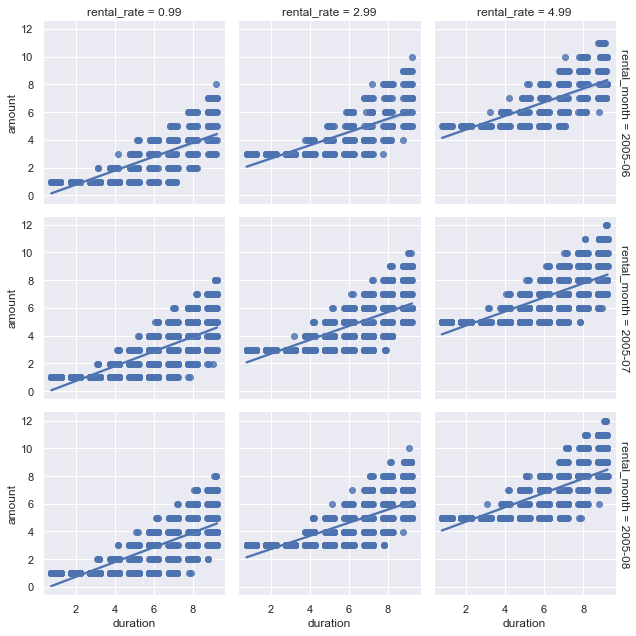

In [721]:
# Explore linear relationship between duration and payment amount by tier in different months
df = rental_paid.loc[:, ['amount', 'rental_rate', 'duration', 'rental_month']]
g = sns.FacetGrid(df, row='rental_month', col='rental_rate', margin_titles=True, height=3)
g.map(sns.regplot,'duration', 'amount')
plt.show()

Here's what I found:
- There is positive linear relationship between duration and amount in all settings;
- The higher the rental rate, the higher the payment amount;
- No obvious differences exist across different months for each tier of rental rate, that means, I can ignore leave it out in regression analysis.


### Prepare Variables to Fit the Model

Now, we can prepare the data to fit the regression model.

In [722]:
# handle categorical variable (make it tidy data)
rates = pd.get_dummies(rental_paid['rental_rate'], drop_first=True)

# combine the categorical variable with other variables
rental_paid = pd.concat([rental_paid[['amount', 'duration']], rates], axis=1)

In [725]:
# rename columns and again, make sure no missing data
rental_paid.columns = ['amount', 'duration', 'rate=2.99', 'rate=4.99']
rental_paid.isna().sum()

amount       0
duration     0
rate=2.99    0
rate=4.99    0
dtype: int64

### Split Data

And then, we need to split the training and testing data. 

In [726]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# splitting the data
x = rental_paid[['duration', 'rate=2.99', 'rate=4.99']]
y = rental_paid['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)

### Fit the Model

In [727]:
model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, model.feature_names_in_)

,0
duration,0.507226
rate=2.99,1.827665
rate=4.99,3.931709


In [728]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Use x_test data to estimate y predictions
y_prediction = model.predict(x_test)

# Compute r^2 score by comparing the sum of squared differences between y_test and y_prediction
score = r2_score(y_test, y_prediction)
print(f'r-square score is: {score:.2f}')

r-square score is: 0.78


##### Conclusion

The $R^2$ score is $0.78$, pretty decent, we can use this model to estimate the outstanding amount for the unpaid rentals as follows:


$$\hat{\text{amount}} = \alpha + \beta_0 \cdot \text{duration} + \beta_1 \cdot \text{bool(rate=2.99)} + \beta_2 \cdot \text{bool(rate=4.99)}$$

Note that the main goal of this project is not in learning how to develoop regression model, therefore, I didn't evaluate the model accuracy further by checking if the dataset meet all assumptions for linear regression, for example, the properties of normality and equal variance of $y$ at any given $x$ using methods like plotting and analyzing residuals. 

## Calculating the Outstanding Balances


Although I can use the above regression model to estimate the outstanding amount, as noted, the purpose of this project is mainly to showcase my SQL skills. It'd be repeating what I have done previously if I just extract the unpaid rental records to apply the model prediction to it.

Therefore, I'd create another use case to hone my SQL skills. 

Let's say, the stores replied to me in how they calculate the payment amount, which is based on the following fee policy:

- The rental rate is for the rental period of 3 days, a day is measured using a 24-hours window;
- For the rental returned after 3 days, the customers can enjoy a 60-minute grace period;
- If a retal is returned outside of the 24 hour time window of the last day plus the grace period, it will be assessed a fee equivalent to 60% of the full day rental rate;
- For example, a customer rented a DVD at `2015-06-02 08:15:00`, if he/she returns the DVD at `2015-06-04 08:15:00`, the fee will be assessed as for 2 days full; If he/she returns the DVD at `2015-06-04 09:15:00`, the fee will be assessed as for 2 days full as well; However, if he/she returns at `2015-06-04 09:16:00`, it has past the time window of  "24 hours + 1 hour grace period", the fee will be assessed as for 3 days full. 

##### Test if the duration calculation complies with the fee policy

In [315]:
%%sql 
SELECT rental_id, inventory_id,
       DATE_TRUNC('minute', return_date-rental_date) as duration_raw,
        CASE
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)>'01:00:00'::time
                 THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date) + INTERVAL '1 day')/3600/24
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)<='01:00:00'::time
                 THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date))/3600/24
        END duration_fixed
from rental
*---change the comparison operator to test > or <= in where clause---*
where DATE_TRUNC('minute', return_date-rental_date)-DATE_TRUNC('day', return_date-rental_date)>'01:00:00'::time
LIMIT 5

 * postgresql://localhost/dvdrental
5 rows affected.


rental_id,inventory_id,duration_raw,duration_fixed
2,1525,"3 days, 20:46:00",4.0
3,1711,"7 days, 23:09:00",8.0
4,2452,"9 days, 2:39:00",10.0
5,2079,"8 days, 5:28:00",9.0
6,2792,"2 days, 2:24:00",3.0


###### 2. Create  `pastdue_rentals` table to store the data of unpaid rental 

In [385]:
%%sql

---delete the temp table if already exists when the code is reused---
DROP TABLE IF EXISTS pastdue_rentals;

---calculate rental duration according to the fee policy---
WITH t1 AS(
SELECT rental_id, inventory_id, rental_date, return_date,
        CASE
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)>'01:00:00'::time
                 THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date) + INTERVAL '1 day')/3600/24
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)<='01:00:00'::time
                 THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date))/3600/24
        END duration
from rental
WHERE rental_id in (SELECT rental_id FROM rental EXCEPT SELECT rental_id FROM payment)
),

---calculate amount past due per rental (duration * rental rate)----
t2 AS(
SELECT rental_id, f.film_id, rental_rate, duration, rental_date, return_date,
       round((rental_rate * duration)::numeric, 2) as past_due
FROM t1
JOIN inventory i ON i.inventory_id = t1.inventory_id
JOIN film f ON f.film_id = i.film_id)


---Save the result into the temp table in db---
SELECT t2.*, cus.customer_id, city, country, store_id
into pastdue_rentals
from t2
JOIN rental r ON r.rental_id = t2.rental_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country co ON co.country_id = c.country_id

 * postgresql://localhost/dvdrental
Done.
1452 rows affected.


[]

# Analyze the Outstanding Balance


Now, use the temporary table `pastdue_rental` to summarize the following:
- amount owed by customer, country
- amount owed by month
- amount owed by store


## Overview of Outstanding Balances

In [386]:
%sql r << SELECT * from pastdue_rentals

 * postgresql://localhost/dvdrental
1452 rows affected.
Returning data to local variable r


In [391]:
df = r.DataFrame()

# convert dtype for columns as objects
df['past_due'] = df['past_due'].astype(float)
df['country'] = df['country'].astype(str)

# convert dates to months so we can aggregate data by month
df['rental_date'] = df['rental_date'].dt.to_period('M')

df.head()

,rental_id,film_id,rental_rate,duration,rental_date,return_date,past_due,customer_id,city,country,store_id
0,1750,245,0.99,10.0,2005-06,2005-06-25 21:51:36,9.90,321,Birgunj,Nepal,1
1,176,187,2.99,6.0,2005-05,2005-06-01 02:36:39,17.94,250,Oyo,Nigeria,2
2,576,407,0.99,8.0,2005-05,2005-06-04 13:15:10,7.92,588,Weifang,China,1
3,292,927,2.99,10.0,2005-05,2005-06-05 00:58:12,29.90,515,Coquimbo,Chile,1
4,764,239,4.99,3.0,2005-05,2005-05-31 16:47:35,14.97,149,Brockton,United States,1


In [392]:
# Total outstanding balance
df['past_due'].sum()

22727.089999999997

In [393]:
# How many customers owe us money
len(df['customer_id'].unique())

530

In [397]:
# Summary of outstanding balance of all rental
df['past_due'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
past_due,1452.0,15.652266,12.504356,0.99,5.94,9.98,23.92,49.9


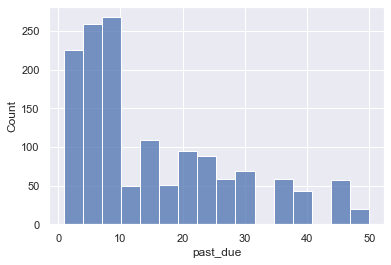

In [396]:
sns.histplot(df['past_due'])
plt.show()

##### Conclusion

There are totally 1452 past due rentals from 530 customers, amounted to $\$22,732.08$ outstanding balance. The average past due charge is around $\$16$ with more than 50% of the uncollectd payments valued at the range of $\$5.94$ and $\$23.92$. By looking at the distribution, which is left skewed with a long right tail, we know that most of the past due charges are of small value ($<=\$10$).

## Which Store is Worse in Collecting Payment

In [398]:
%%sql
SELECT store_id,
       count(distinct(country)) as num_of_country,
       count(rental_id) as num_of_rental,
       count(distinct(customer_id)) as num_of_customer,
       sum(past_due) as past_due_total
FROM pastdue_rentals
GROUP BY store_id

 * postgresql://localhost/dvdrental
2 rows affected.


store_id,num_of_country,num_of_rental,num_of_customer,past_due_total
1,74,790,289,12791.85
2,77,662,241,9935.24


Store 1 has the highest outstanding balance valued at `$12,791.85`, it's the total past due amount of `790` unpaid rentals from `289` customers in `74` countries.  Note that the dataset contains customer data from many countries, however, there are only 2 stores. I'll ignore the reason why this is the case, since this dataset is not real.

Now, I'll take a closer look at the outstanding balances distributions in different countries by store:

In [399]:
%sql r << SELECT * from pastdue_rentals WHERE country in :top5perc

 * postgresql://localhost/dvdrental
602 rows affected.
Returning data to local variable r


In [403]:
df = r.DataFrame()
# convert dtype for columns as objects
df['past_due'] = df['past_due'].astype(float)
df['country'] = df['country'].astype(str)
df.groupby('store_id')['past_due'].describe()

,count,mean,std,min,25%,50%,75%,max
store_id,,,,,,,,
1,334.0,15.309731,12.068299,0.99,5.95,9.98,23.92,49.9
2,268.0,15.618433,12.411300,0.99,5.98,9.98,23.92,49.9


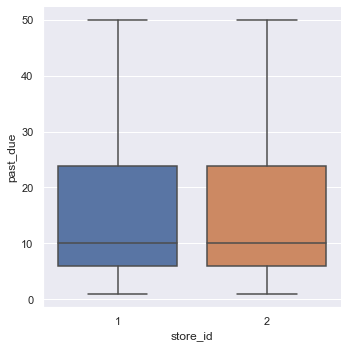

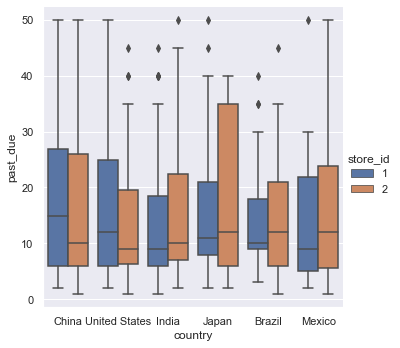

In [404]:
# Visualize outstanding balances distributions in these countries by store
sns.catplot(kind='box', x='store_id', y='past_due', data=df)
sns.catplot(kind='box', x='country', y='past_due', hue='store_id', 
            data=df.loc[df.country.isin(top5perc)])
plt.show()

##### Conclusion

Both stores have the pastdue amount centered around `$15`; both stores have more than `50%` of the unapid rentals valued between `5.95` and `23.92`; also both stores are found with the same minimum and maximum pastdue amounts.

However, if we observe further with consideration of customers' countries, it's interesting to find that store 1 and store 2 performed quite differently in the top `5%` countries. Especially for Japan, store 2 has a much wider range of uncollected outstanding balances per rental than store 1. In fact, the outstanding amount owed by the store 2 customers in Japan varied the most largely than other customers.

## Where are the customers that owe us money


Let's see which 5 countries have the most outstanding balance and number of customers involved.

In [504]:
%%sql
SELECT country,
       sum(past_due) as past_due_total,
       count(distinct(customer_id)) as num_of_customer
FROM pastdue_rentals
GROUP BY country
ORDER BY past_due_total DESC, num_of_customer DESC
LIMIT 5

 * postgresql://localhost/dvdrental
5 rows affected.


country,past_due_total,num_of_customer
China,2125.12,50
India,2073.59,52
United States,1608.52,32
Japan,1286.83,28
Mexico,1207.48,28


We will now take a closer look at the total outstanding payment per customer in the top 5 countries with te highest outstanding balances.

In [515]:
%%sql r <<
SELECT country, 
       round(sum(past_due) over(partition by customer_id),2) as past_due, 
       customer_id
FROM pastdue_rentals
WHERE country in 
(
    SELECT country
    FROM pastdue_rentals
    GROUP BY country
    ORDER BY sum(past_due) DESC, count(distinct(customer_id)) DESC
    LIMIT 5
)

 * postgresql://localhost/dvdrental
535 rows affected.
Returning data to local variable r


In [516]:
df = r.DataFrame()
df['past_due'] = df['past_due'].astype(float)
df.head()

,country,past_due,customer_id
0,Japan,14.85,1
1,Japan,14.85,1
2,United States,9.98,2
3,United States,35.90,6
4,United States,35.90,6


In [521]:
df.groupby('country')['past_due'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,130.0,59.042692,36.601024,1.98,31.1625,55.325,79.78,160.59
India,151.0,65.594437,51.105178,3.96,23.9400,49.900,100.63,164.59
Japan,77.0,71.076104,51.605603,3.96,34.9300,51.840,102.63,174.51
Mexico,78.0,61.858974,36.038253,0.99,32.3700,53.860,91.56,123.44
United States,99.0,67.807980,41.612446,4.99,33.8700,61.840,87.72,180.57


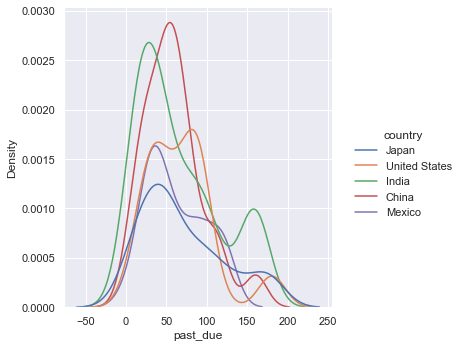

In [517]:
sns.displot(data=df, x='past_due', hue='country', kind='kde')
plt.show()

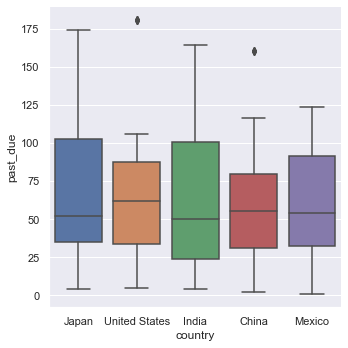

In [518]:
sns.catplot(x='country', y='past_due', data=df, kind='box')
plt.show()

There are totally 1452 rentals unpaid with $\$22,732.08$ outstanding balance. 